# Notebook to examine relationships only between ET, P and Snowpack at P301 in CA

Discharge isnt really necessary if I make the assumption that $Q = P - ET$.

I assume that the snow depth sensors and flux tower are close enough to be considered the same place

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import scipy as sp
import glob
import calendar

pylab.rcParams['figure.figsize'] = (22.0, 11.0)

In [33]:
ft = pd.read_pickle('./data/P301.pcl')

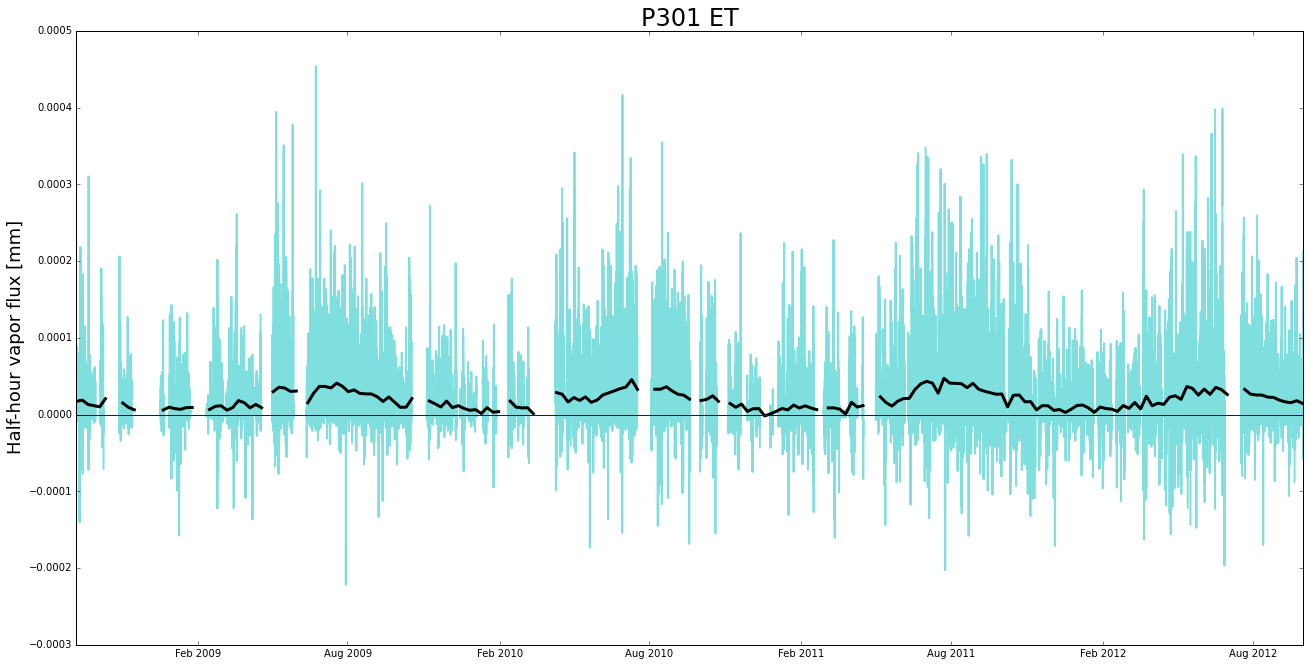

In [34]:
plt.plot(ft.index, ft.ET, 'c', lw=2, alpha=0.5)
plt.plot(ft.resample('%W',how='mean').index, ft.resample('%W',how='mean').ET, 'k',lw = 3)
plt.title('P301 ET', fontsize=24)
plt.ylabel('Half-hour vapor flux [mm]', fontsize = 18);
plt.axhline(0);

## Load Precip

In [35]:
p = pd.read_pickle('./data/p301/p301_P.pcl')
swe = pd.read_pickle('./data/p301/p301_SWE.pcl')

## Load SWE Data

In [36]:
sd = pd.read_pickle('./data/p301_KREW_snowpack_metrics.pcl')

In [37]:
sd.describe()

,peakswe,ablationrate,ablationseason,growseasonlength,ablP,wflux
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,53.612191,1.239649,30.285714,187.428571,13.698800,1.519548
std,30.711845,0.729157,36.118851,16.420081,14.292872,0.809066
min,12.165982,-0.296731,-41.000000,158.000000,0.000000,-0.296731
25%,31.605517,1.233780,24.500000,180.500000,1.685000,1.705083
50%,57.647610,1.468414,39.000000,196.000000,10.914000,1.766734
75%,70.682125,1.529113,46.500000,199.000000,22.032500,1.877050
max,100.896460,1.980072,72.000000,199.000000,37.542600,2.002572


In [38]:
sd

,peakswe,peakswedate,snowfreedate,ablationrate,ablationseason,growseasonlength,ablP,wflux
2008,67.943530,2008-03-15,2008-04-27,1.580082,43,199,3.1000,1.652175
2009,57.647610,2009-03-15,2009-04-23,1.478144,39,199,10.9140,1.757990
2010,73.420720,2010-04-12,2010-06-01,1.468414,50,171,18.1460,1.831334
2011,100.896460,2011-03-24,2011-06-04,1.401340,72,190,37.5426,1.922765
2012,39.450170,2012-03-18,2012-04-24,1.066221,37,196,25.9190,1.766734
2013,23.760864,2013-03-15,2013-03-27,1.980072,12,199,0.2700,2.002572
2014,12.165982,2014-04-25,2014-03-15,-0.296731,-41,158,0.0000,-0.296731


# Extract Similar metrics for ET and P

### P

In [39]:
wyears = sd.index # grab the water years

fall = range(10,13)
print 'Fall: '+str(fall)
winter = range(1,4)
print 'Winter: '+str(winter)
spring = range(4,7)
print 'Spring: '+str(spring)
summer = range(7,10)
print 'Summer: '+str(summer)

cool = range(10,13)+range(1,5)
print 'Cool: '+str(cool)
warm = range(5,10)
print 'Warm: '+str(warm)

Fall: [10, 11, 12]
Winter: [1, 2, 3]
Spring: [4, 5, 6]
Summer: [7, 8, 9]
Cool: [10, 11, 12, 1, 2, 3, 4]
Warm: [5, 6, 7, 8, 9]


In [40]:
wyears = wyears[1:5]

In [41]:
wyears

Int64Index([2009, 2010, 2011, 2012], dtype='int64')

In [42]:
#cols = ['wyP','coolP','springP','summerP']
cols = ['wyP','coolP','warmP','springP','summerP','fallP','winterP']

P = pd.DataFrame(np.zeros([len(wyears),len(cols)]),index=wyears, columns=cols)

for year in wyears:
    P.loc[year, 'wyP'] = np.sum(p.loc[str(year-1)+'-10-01':str(year)+'-09-30'].P_upper)
    #P.loc[year, 'snowFraction'] = np.sum(wx.loc[str(year-1)+'-10-01':str(year)+'-09-30'].snow)
    
    # Extract end dates for the seasons
    
    #coolend = calendar.monthrange(year-1,cool[-1])[-1] 
    #warmend = calendar.monthrange(year,warm[-1])[-1]
    
    #fallend = calendar.monthrange(year-1,fall[-1])[-1]
    #winterend = calendar.monthrange(year,winter[-1])[-1]
    #springend = calendar.monthrange(year,spring[-1])[-1]
    #summerend = calendar.monthrange(year,summer[-1])[-1]
    
    #coolstartdate = str(year-1)+'-'+str(cool[0])+'-01'
    #coolenddate = str(year)+'-'+str(cool[-1])+'-'+str(coolend)
    
    #warmstartdate = str(year)+'-'+str(warm[0])+'-01'
    #warmenddate = str(year)+'-'+str(warm[-1])+'-'+str(warmend)
    
    
    #fallstartdate = str(year-1)+'-'+str(fall[0])+'-01'
    #fallenddate = str(year-1)+'-'+str(fall[-1])+'-'+str(fallend)
    
    #winterstartdate = str(year)+'-'+str(winter[0])+'-01'
    #winterenddate = str(year)+'-'+str(winter[-1])+'-'+str(winterend)
    
    #springstartdate = str(year)+'-'+str(spring[0])+'-01'
    #springenddate = str(year)+'-'+str(spring[-1])+'-'+str(springend)
    
    #summerstartdate = str(year)+'-'+str(summer[0])+'-01'
    #summerenddate = str(year)+'-'+str(summer[-1])+'-'+str(summerend)
    
    
    #P.loc[year, 'coolP'] = np.sum(p.loc[coolstartdate:coolenddate].P_upper)
    #P.loc[year, 'warmP'] = np.sum(p.loc[warmstartdate:warmenddate].P_upper)
    
    #P.loc[year, 'fallP'] = np.sum(p.loc[fallstartdate:fallenddate].P_upper)
    
    #P.loc[year, 'winterP'] = np.sum(p.loc[winterstartdate:winterenddate].P_upper)
    
    #P.loc[year, 'springP'] = np.sum(p.loc[springstartdate:springenddate].P_upper)
    
    #P.loc[year, 'summerP'] = np.sum(p.loc[summerstartdate:summerenddate].P_upper)
    
    
#P.snowFraction /= P.wyP

In [43]:
P.wyP

2009    1266.354
2010    1630.114
2011    2283.116
2012    1018.262
Name: wyP, dtype: float64

### ET

In [44]:
cols = ['wyET','growET','aveGrowET']

ET = pd.DataFrame(np.zeros([len(wyears),len(cols)]),index=wyears, columns=cols)

for year in wyears:
    ET.loc[year,'wyET'] = np.sum(ft.loc[str(year-1)+'-10-01':str(year)+'-09-30'].tot_ET) # compute water year ET
    
    strt = sd.ix[year].peakswedate
    
    ET.loc[year,'growET'] = np.sum(ft.loc[str(strt.year)+'-'+str(strt.month)+'-'+str(strt.day):str(year)+'-09-30'].tot_ET)
    
    ET.loc[year,'aveGrowET'] = ET.loc[year,'growET']/sd.loc[year,'growseasonlength']
    

In [45]:
ET

,wyET,growET,aveGrowET
2009,418.304889,363.014441,1.824193
2010,399.239487,322.660325,1.886902
2011,488.751026,397.856554,2.093982
2012,442.284259,318.428610,1.624636


### Derived Metrics

In [46]:
cols = ['wyPartitioning','growPartitioning']

MET = pd.DataFrame(np.zeros([len(wyears),len(cols)]),index=wyears, columns=cols)

for year in wyears:
    MET.loc[year,'wyPartitioning'] = ET.loc[year,'wyET'] / P.loc[year,'wyP']
    MET.loc[year,'growPartitioning'] = ET.loc[year,'growET'] / P.loc[year,'wyP']
    #MET.loc[year,'peakSWEFrac'] = SWE.loc[year,'peakswe']/ P.loc[year,'wyP']
    #MET.loc[year,'wyGrowPartitioningSWE'] = ET.loc[year,'growET']/ SWE.loc[year,'peakswe']
    

In [47]:
MET

,wyPartitioning,growPartitioning
2009,0.330322,0.286661
2010,0.244915,0.197937
2011,0.214072,0.174260
2012,0.434352,0.312718


## Load ET and NEE Metrics

In [48]:
ETNEE = pd.read_pickle('./data/p301_flux_metrics.pcl')

In [49]:
ETNEE

,peakET,peakETdate,minET,minETdate,peakNEE,peakNEEdate,minNEE,minNEEdate
2009,0.8170837,2009-06-23 17:30:00,-0.399178,2009-07-30 00:00:00,-60156.71,2009-08-14 02:30:00,26443.28,2009-08-23 07:00:00
2010,0.7498029,2010-06-29 18:00:00,-0.3122256,2010-05-21 09:30:00,-59921.82,2010-05-02 17:00:00,38550.97,2010-01-06 04:30:00
2011,0.6260815,2011-07-01 18:00:00,-0.3652565,2011-07-25 10:30:00,-55619.67,2011-09-11 21:00:00,50334.45,2011-04-07 13:00:00
2012,0.7175643,2012-06-25 01:30:00,-0.3542102,2012-06-27 12:30:00,-56039.65,2012-04-24 21:30:00,48757.7,2012-08-18 08:00:00


In [50]:
sd

,peakswe,peakswedate,snowfreedate,ablationrate,ablationseason,growseasonlength,ablP,wflux
2008,67.943530,2008-03-15,2008-04-27,1.580082,43,199,3.1000,1.652175
2009,57.647610,2009-03-15,2009-04-23,1.478144,39,199,10.9140,1.757990
2010,73.420720,2010-04-12,2010-06-01,1.468414,50,171,18.1460,1.831334
2011,100.896460,2011-03-24,2011-06-04,1.401340,72,190,37.5426,1.922765
2012,39.450170,2012-03-18,2012-04-24,1.066221,37,196,25.9190,1.766734
2013,23.760864,2013-03-15,2013-03-27,1.980072,12,199,0.2700,2.002572
2014,12.165982,2014-04-25,2014-03-15,-0.296731,-41,158,0.0000,-0.296731


# Plots

AttributeError: 'DataFrame' object has no attribute 'swe'

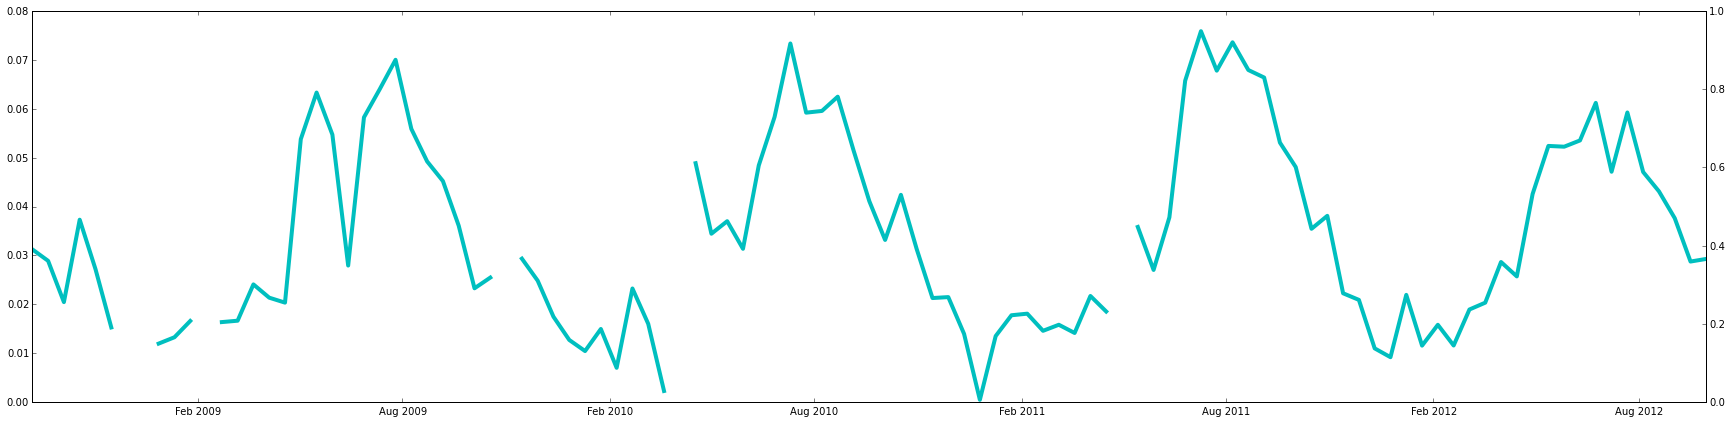

In [51]:
fig = plt.figure(figsize=[30,7]);
ax = plt.gca();
ax2 = ax.twinx();

lns1 = ax.plot(ft.resample('2W',how=mean).index,ft.resample('2W',how=mean).tot_ET,'c',lw=4,label='ET')

lns2 = ax2.plot(sd.index, sd.swe, 'b',lw=3,label='SWE')

plt.setp(ax.get_ymajorticklabels(),fontsize=30)
plt.setp(ax2.get_ymajorticklabels(),fontsize=30)
plt.setp(ax.get_xmajorticklabels(), fontsize=30)
plt.setp(ax2.get_xmajorticklabels(), fontsize=30)

ax.set_ylabel('ET [mm/m$^2$ $\cdot$ 30 min]', fontsize = 34)
ax2.set_ylabel('SWE [cm]', fontsize=34)
ax2.set_ylim([0,25])
ax.set_ylim([0.0,0.1])

plt.title('Providence Creek, CA', fontsize = 40 )

lns = lns1+lns2
labs = [l.get_label() for l in lns];
ax.legend(lns, labs, loc='upper left', fontsize=30);

#plt.savefig('./figures/agu14_figs/p301_timeseries_etSWE.pdf',bbox_inches='tight',transparent=True)

In [ ]:
# For Adrian's CUAHSI Talk

fig = plt.figure(figsize=[30,10]);
ax = plt.gca();
ax2 = ax.twinx();

lns1 = ax.plot(ft.resample('2W',how=mean).index,ft.resample('2W',how=mean).tot_ET,'c',lw=6,label='ET')

lns2 = ax2.plot(sd.index, sd.swe, 'b',lw=6,label='SWE')

plt.setp(ax.get_ymajorticklabels(),fontsize=35)
plt.setp(ax2.get_ymajorticklabels(),fontsize=35)
plt.setp(ax.get_xmajorticklabels(), fontsize=32)
plt.setp(ax2.get_xmajorticklabels(), fontsize=32)

ax.set_ylabel('ET [mm/m$^2$ $\cdot$ 30 min]', fontsize = 35)
ax2.set_ylabel('SWE [cm]', fontsize=35)
ax2.set_ylim([0,25])
ax.set_ylim([0.0,0.1])

plt.title('Providence Creek, CA', fontsize = 40 )

lns = lns1+lns2
labs = [l.get_label() for l in lns];
ax.legend(lns, labs, loc='upper left', fontsize=35);

#plt.savefig('./figures/agu14_figs/p301_timeseries_etSWE.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./figures/p301_SWE_ET_for_AAH.pdf', bbox_inches='tight',transparent=True)

AttributeError: 'DataFrame' object has no attribute 'swe'

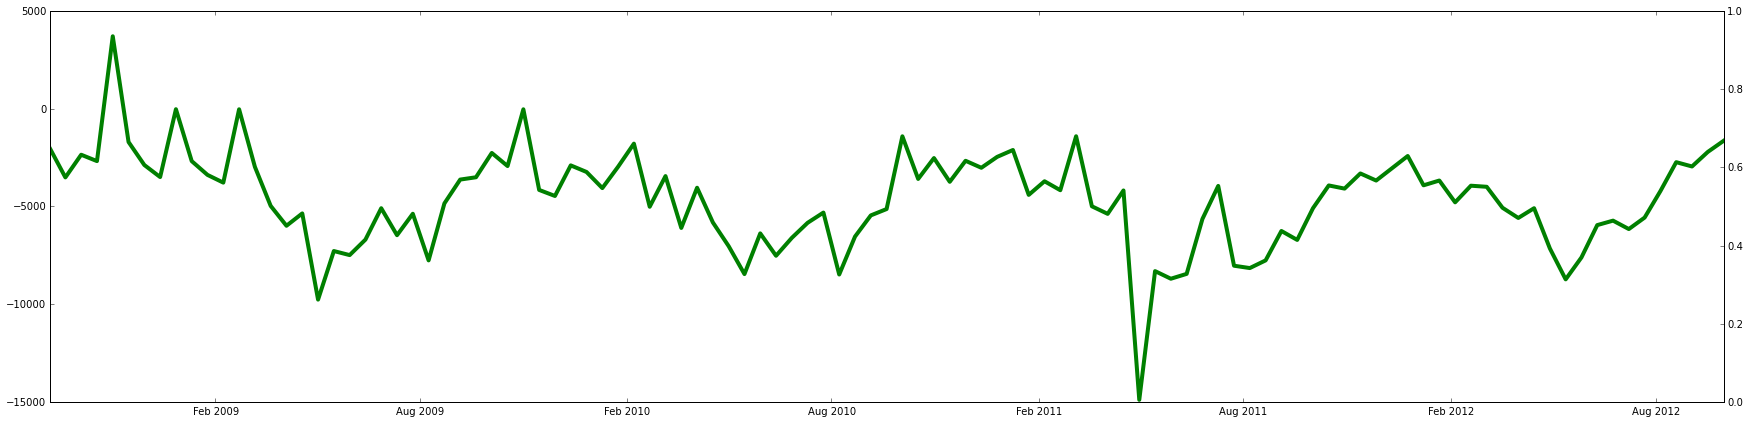

In [52]:
fig = plt.figure(figsize=[30,7]);
ax = plt.gca();
ax2 = ax.twinx();

lns1 = ax.plot(ft.resample('2W',how=mean).index,ft.resample('2W',how=mean).tot_NEE,'g',lw=4,label='NEE')

lns2 = ax2.plot(sd.index, sd.swe, 'b',lw=3,label='SWE')

plt.setp(ax.get_ymajorticklabels(),fontsize=30)
plt.setp(ax2.get_ymajorticklabels(),fontsize=30)
plt.setp(ax.get_xmajorticklabels(), fontsize=30)
plt.setp(ax2.get_xmajorticklabels(), fontsize=30)

ax.set_ylabel('NEE [$\mu$mol C/m$^2$ $\cdot$ 30 min]', fontsize = 34)
ax2.set_ylabel('SWE [cm]', fontsize=34)

ax2.set_ylim([0,25])
ax.set_ylim([-15000,5000])

plt.title('Providence Creek, CA', fontsize = 40 )

lns = lns1+lns2
labs = [l.get_label() for l in lns];
ax.legend(lns, labs, loc='upper left', fontsize=30);
ax.set_ylim([-17000,5000])
ax.invert_yaxis()
plt.savefig('./figures/agu14_figs/p301_timeseries_neeSWE.pdf',bbox_inches='tight',transparent=True)

In [53]:
from scipy import stats

def linpred(slope,intercept,xvals):
    yvals = (xvals*slope)+intercept
    return yvals

In [54]:
sd = sd[1:5]

**Regression:**
pValue: 0.21468829956
Slope: -0.398545842883
Intercept: 0.845358971009


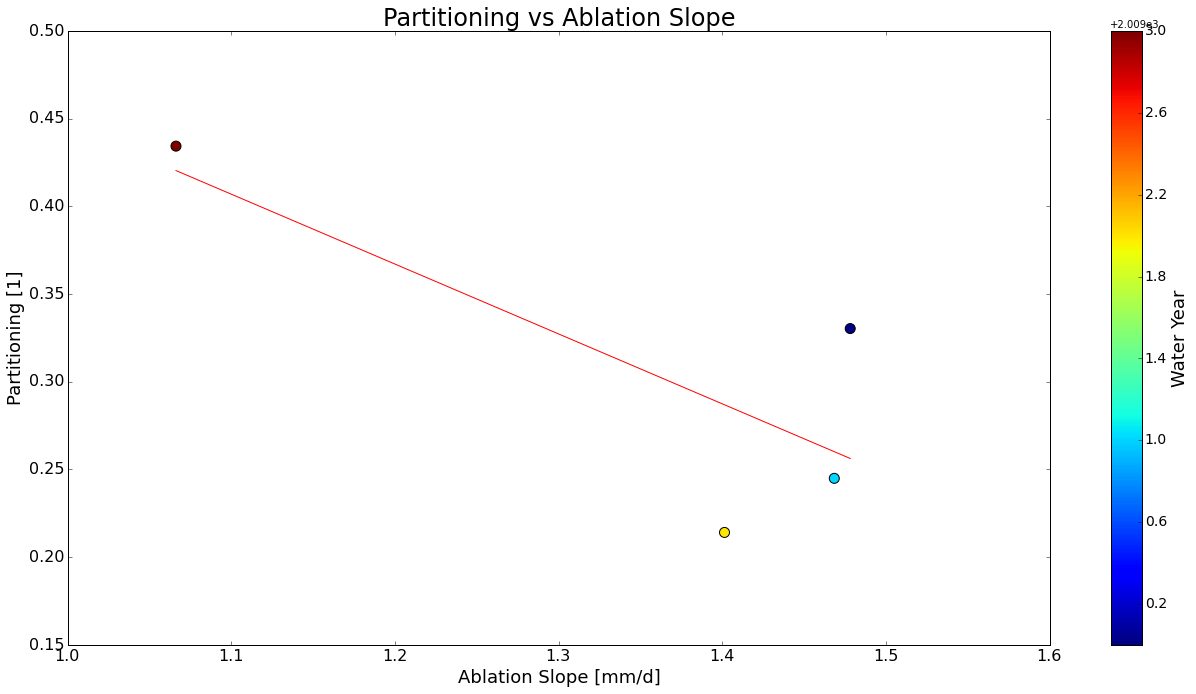

In [55]:
ttl = 'Partitioning vs Ablation Slope'
x = sd.ablationrate
xlab = 'Ablation Slope [mm/d]'
y = MET.wyPartitioning
ylab = 'Partitioning [1]'

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, 100, c = sd.index)
cb = plt.colorbar()
cb.set_label('Water Year', fontsize = 18)


plt.title(ttl, fontsize = 24)
plt.ylabel(ylab, fontsize = 18)
plt.xlabel(xlab, fontsize = 18)
plt.plot(x, yvals, 'r-')


ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
cb.ax.tick_params(labelsize=14) 
############################################
print '**Regression:**'               
print 'pValue: ' + str(p_value)
print 'Slope: ' + str(slope)
print 'Intercept: ' + str(intercept)

**Figure 1:** Water year precipitation partitiong versus ablation slope. Aside from 2008(?) more water is partitioned to ET with slower ablation. 

In [155]:
# Plotting parameters for poster figs

titlefont = 30
axfont = 24
axtickfont = 22

legendfontsize = 30

pointsize = 250

eqtext = 20

# turn on if you want to output figures
printfigs = False
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

annotatey = np.linspace(90,55,8)/100.

In [156]:
import statsmodels.api as sm

In [157]:
vic_mod = pd.read_pickle('../Budyko_vic/models/P301_vic_gsET_PvsFlux.mod')

In [158]:
vic_mod.f_pvalue

2.888414782913304e-08

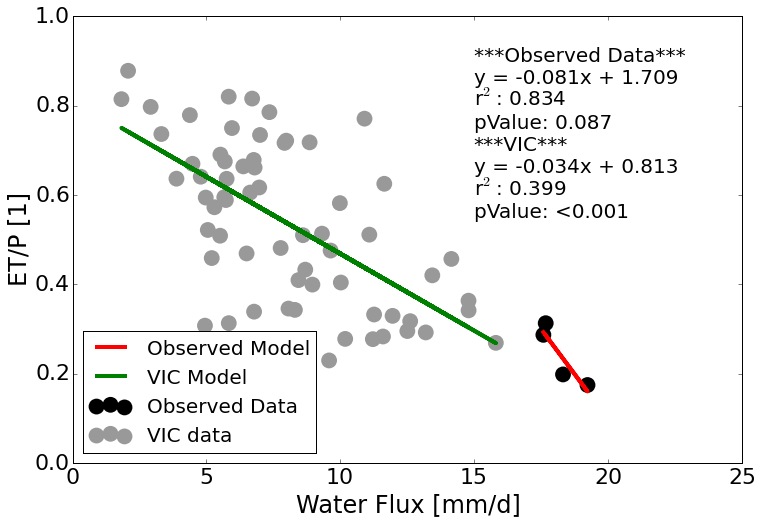

In [164]:
fig = plt.figure(figsize=(12.0, 8.0))
printfigs = True
wyrs = ['09','10','11','12']

ttl = 'Providence Creek, CA'
x = sd.wflux*10
xlab = 'Water Flux [mm/d]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
annotatex = 15
out = './figures/agu14_figs/gsET_vs_AblationSlp_P301.pdf'


#######################################
x3 = x
y3 = y

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)

ax = fig.add_subplot(111)
ax.scatter(x, y, pointsize, c = 'k', edgecolor='none')

#plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-', lw = 4)

plt.xlim([0,25])
plt.ylim([0.0,1])

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 

# plot VIC model results
ax.scatter(vic_mod.model.data.orig_exog.flux,vic_mod.model.data.orig_endog,pointsize, c='0.6', edgecolor='none')
ax.plot(vic_mod.model.data.orig_exog.flux,vic_mod.fittedvalues,'g-',lw=4)
#plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

#plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
plt.text(annotatex,annotatey[0],'***Observed Data***', fontsize=eqtext)
plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

EQ = 'y = '+str(round(vic_mod.params.as_matrix()[1],3))+'x + '+str(round(vic_mod.params.as_matrix()[0],3))

plt.text(annotatex,annotatey[4],'***VIC***', fontsize=eqtext)
plt.text(annotatex,annotatey[5],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[6],'r$^2$: '+str(round(vic_mod.rsquared,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[7],'pValue: <0.001', fontsize = eqtext)

ax.legend(['Observed Model','VIC Model','Observed Data','VIC data'], loc = 'lower left', fontsize = eqtext)

plt.savefig('./figures/p301_wflux_wyET_P_VIC_wsnow.pdf',bbox_in='tight',background='transparent')

**Figure 2:** The relationship from Figure 1 holds when only growing season ET (date of peak SWE to September 30th) is considered.

Why doesn't 2008 fall on the line? Is there a difference in the seasonality of precip that year?

Without 2008, the relationship becomes significant.

**With 2008:**
pValue: 0.696375652185
Slope: 0.127789284732
Intercept: 0.47666469198

**Without 2008:**
pValue: 0.376779282356
Slope: -0.207879003522
Intercept: 0.576610549278


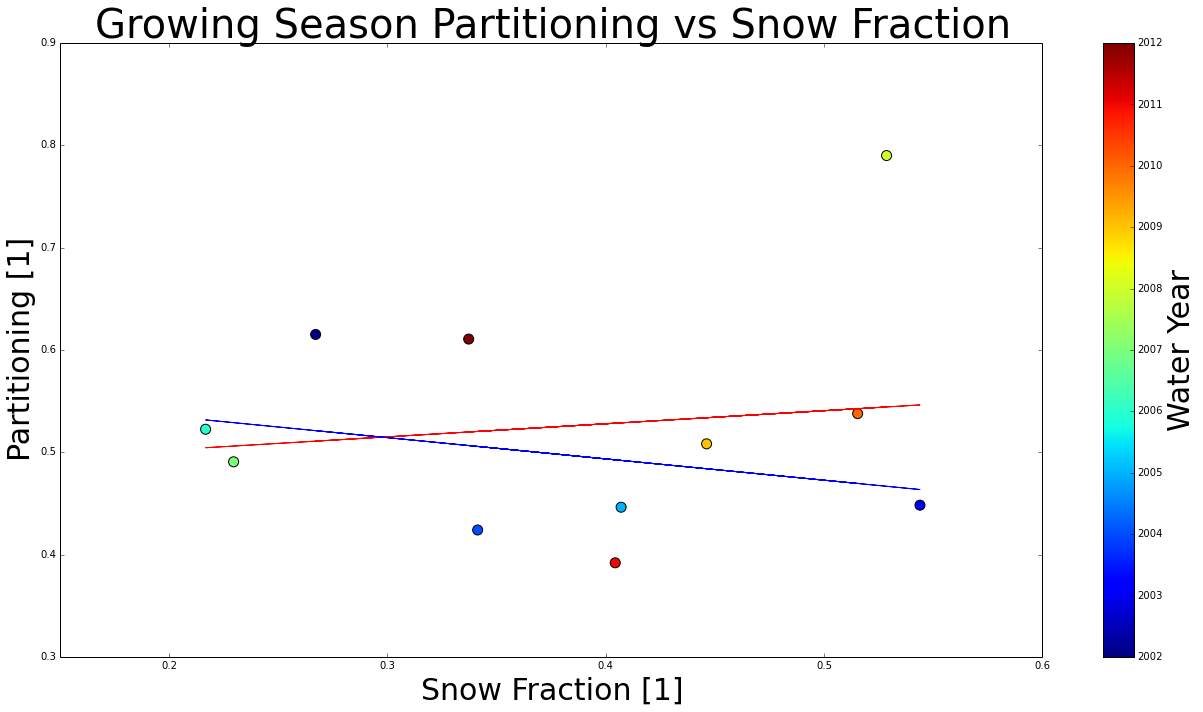

In [36]:
ttl = 'Growing Season Partitioning vs Snow Fraction'
x = P.snowFraction
xlab = 'Snow Fraction [1]'
y = MET.growPartitioning
ylab = 'Partitioning [1]'

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, 100, c = SWE.index)
cb = plt.colorbar()
cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')

## regression without 2008

x = x[x.index!=exclude]
y = y[y.index!=exclude]

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
yvals = linpred(slope2, intercept2, x)

plt.plot(x, yvals, 'b-')
############################################
print '**With 2008:**'               
print 'pValue: ' + str(p_value)
print 'Slope: ' + str(slope)
print 'Intercept: ' + str(intercept)
print
print '**Without 2008:**'
print 'pValue: ' + str(p_value2)
print 'Slope: ' + str(slope2)
print 'Intercept: ' + str(intercept2)

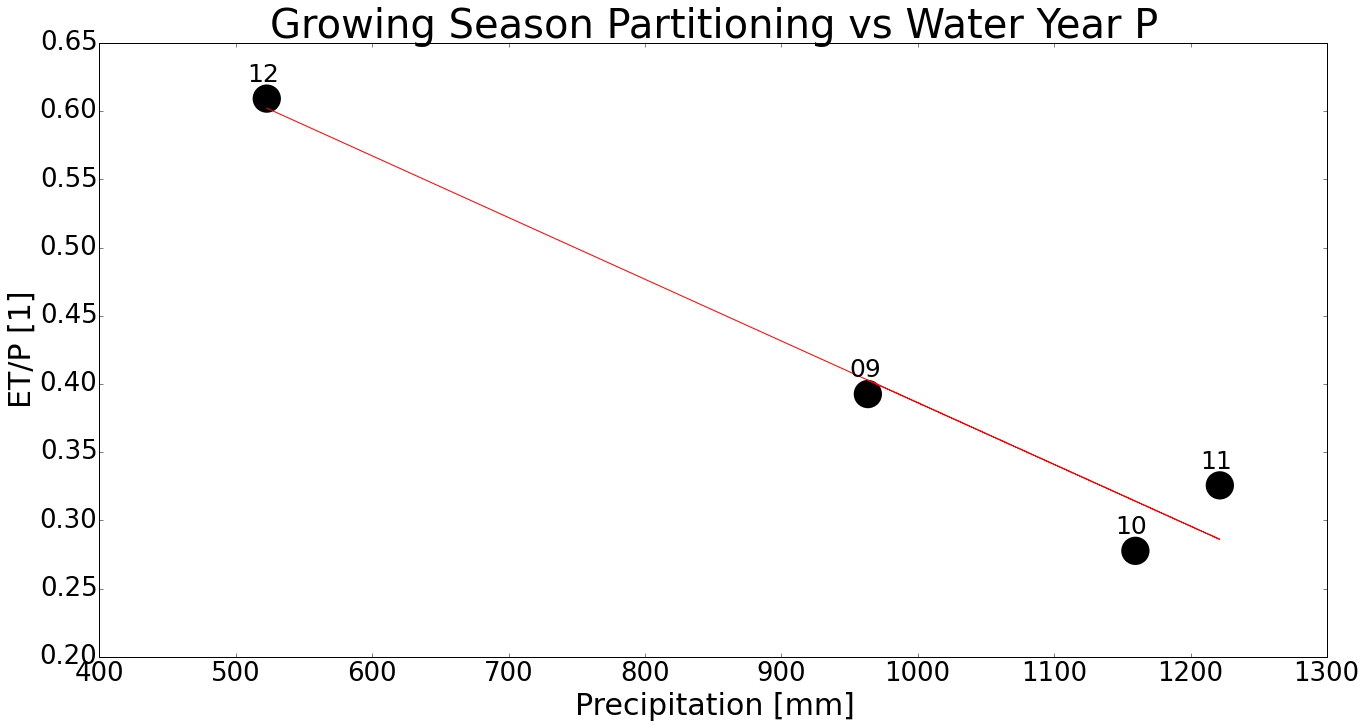

In [100]:
wyrs = ['09','10','11','12']
ttl = 'Growing Season Partitioning vs Water Year P'
x = P.wyP
xlab = 'Precipitation [mm]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
out = './figures/gsET_vs_Precip.pdf'
annotatex = 840
#annotatey = [0.85,0.83,0.81,0.79,0.76,0.74,0.72,0.70]

#######################################

x3 = x
y3 = y

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

#plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
#plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
#plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
#plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)


for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)

#plt.text(x,y,wyrs);
#plt.show

if printfigs == True:
    plt.savefig(out,transparent = True, bbox_inches = 'tight')

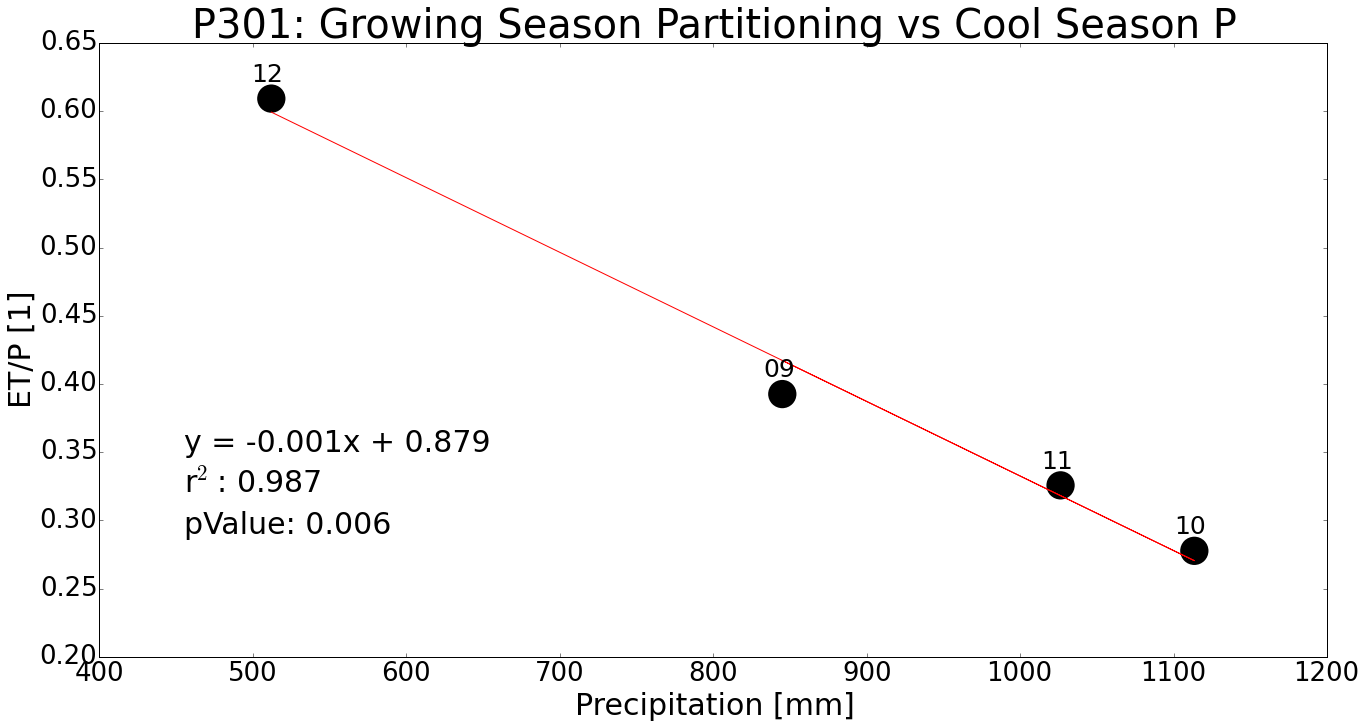

In [106]:
printfigs=True
wyrs = ['09','10','11','12']
ttl = 'P301: Growing Season Partitioning vs Cool Season P'
x = P.coolP
xlab = 'Precipitation [mm]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
out = './figures/agu14_figs/P301gsET_vs_CoolPrecip.pdf'
annotatey = [0.35,0.32,0.29,0.79,0.76,0.74,0.72,0.70]
annotatex = 455

#######################################

x3 = x
y3 = y

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[1],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[2],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)

#plt.text(x,y,wyrs);
#plt.show

if printfigs == True:
    plt.savefig(out,transparent = True, bbox_inches = 'tight')

This suggests that cool season P magnitude controls how P is partitioned between ET and R

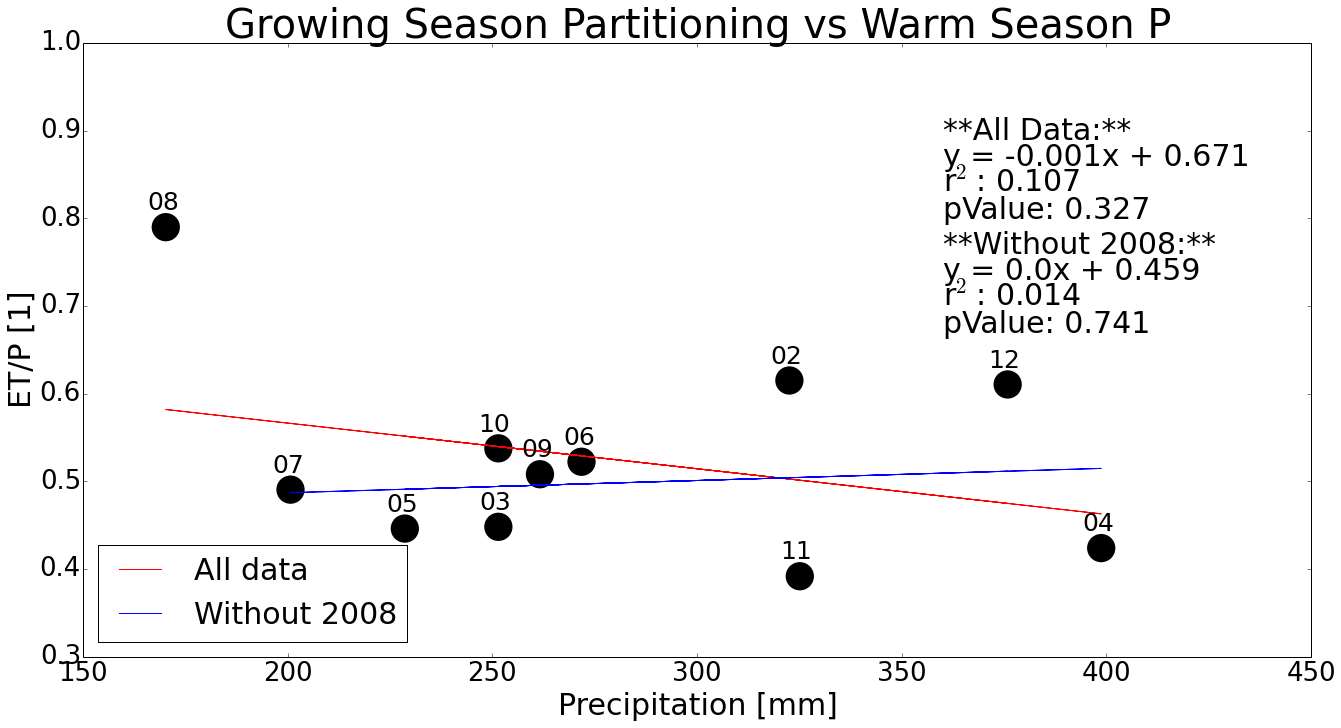

In [39]:
wyrs = ['02','03','04','05','06','07','08','09','10','11','12']
ttl = 'Growing Season Partitioning vs Warm Season P'
x = P.warmP
xlab = 'Precipitation [mm]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
out = './figures/gsET_vs_WarmPrecip.pdf'
annotatey = [0.89,0.86,0.83,0.80,0.76,0.73,0.70,0.67]

annotatex = 360

#######################################

x3 = x
y3 = y

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')


## regression without 2008

x = x[x.index!=exclude]
y = y[y.index!=exclude]

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
yvals = linpred(slope2, intercept2, x)

plt.plot(x, yvals, 'b-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 
plt.ylim([0.3,1])
plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

EQ = 'y = '+str(round(slope2,3))+'x + '+str(round(intercept2,3))

plt.text(annotatex,annotatey[4],'**Without 2008:**', fontsize = eqtext)
plt.text(annotatex,annotatey[5],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[6],'r$^2$: '+str(round(r_value2**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[7],'pValue: ' + str(round(p_value2,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)

#plt.text(x,y,wyrs);
#plt.show

if printfigs == True:
    plt.savefig(out,transparent = True, bbox_inches = 'tight')

This suggests that warm season P has little bearing on how growing season ET is paritioned.

**With 2008:**
pValue: 0.363354839277
Slope: -0.00043023836338
Intercept: 0.674822111256

**Without 2008:**
pValue: 0.0403422838513
Slope: -0.000588582782958
Intercept: 0.701321004631


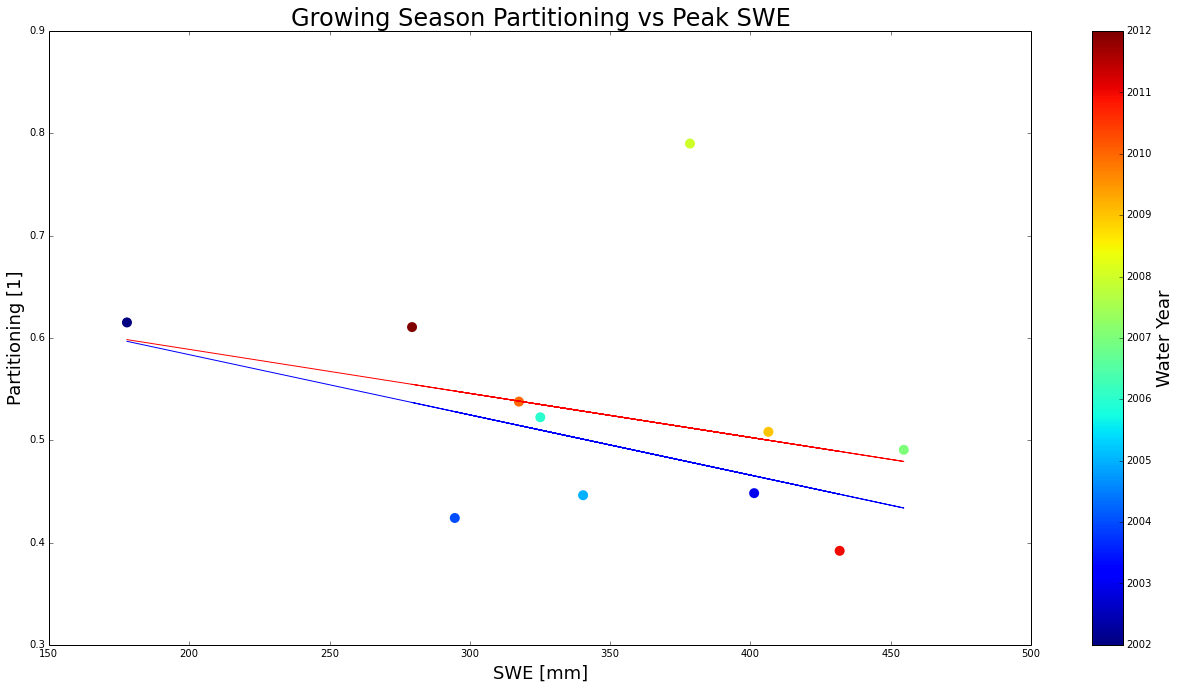

In [40]:
ttl = 'Growing Season Partitioning vs Peak SWE'
x = SWE.peakswe
xlab = 'SWE [mm]'
y = MET.growPartitioning
ylab = 'Partitioning [1]'

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, 100, c = SWE.index, edgecolor='none')
cb = plt.colorbar()
cb.set_label('Water Year', fontsize = 18)

plt.title(ttl, fontsize = 24)
plt.ylabel(ylab, fontsize = 18)
plt.xlabel(xlab, fontsize = 18)
plt.plot(x, yvals, 'r-')


## regression without 2008

x = x[x.index!=exclude]
y = y[y.index!=exclude]

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
yvals = linpred(slope2, intercept2, x)

plt.plot(x, yvals, 'b-')
############################################
print '**With 2008:**'               
print 'pValue: ' + str(p_value)
print 'Slope: ' + str(slope)
print 'Intercept: ' + str(intercept)
print
print '**Without 2008:**'
print 'pValue: ' + str(p_value2)
print 'Slope: ' + str(slope2)
print 'Intercept: ' + str(intercept2)

This is also significant when 2008 is removed. Why is this?

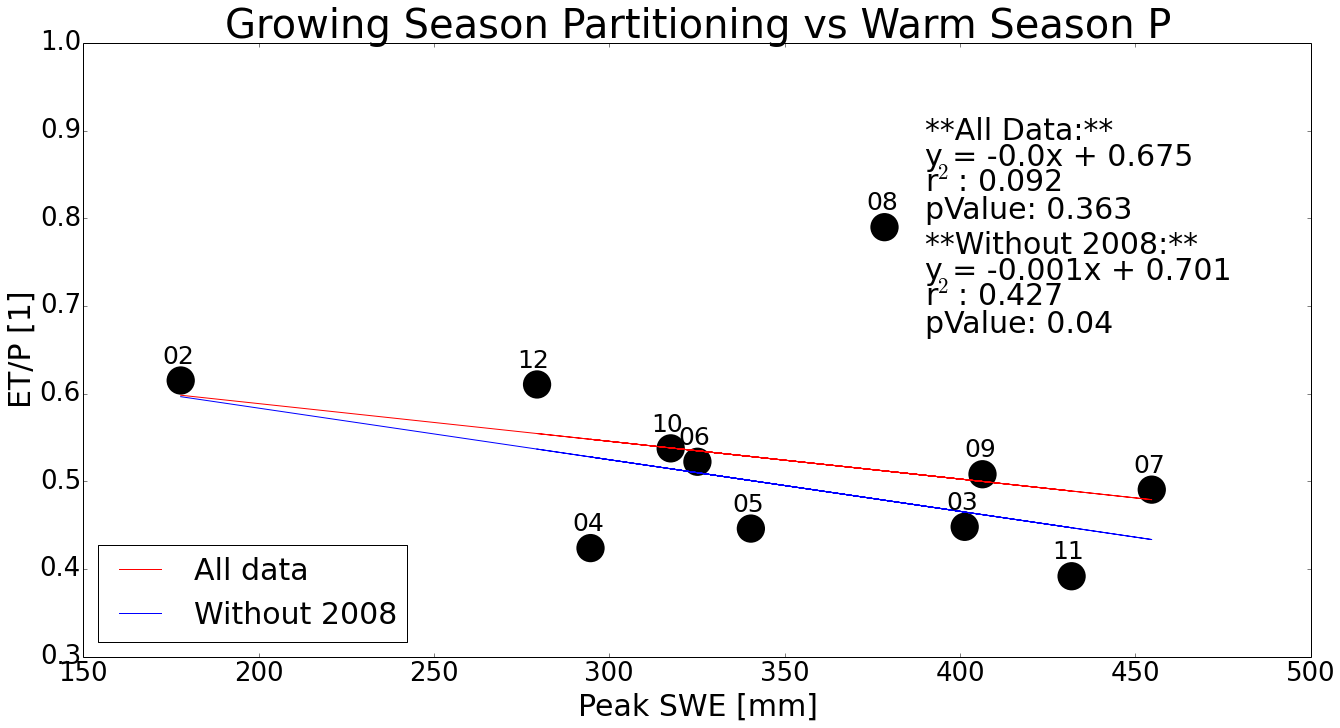

In [41]:
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

wyrs = ['02','03','04','05','06','07','08','09','10','11','12']
ttl = 'Growing Season Partitioning vs Warm Season P'
x = SWE.peakswe
xlab = 'Peak SWE [mm]'
y = MET.growPartitioning
ylab = 'ET/P [1]'
out = './figures/gsET_vs_PeakSWE.pdf'
annotatey = [0.89,0.86,0.83,0.80,0.76,0.73,0.70,0.67]

annotatex = 390

#######################################

x3 = x
y3 = y

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')


## regression without 2008

x = x[x.index!=exclude]
y = y[y.index!=exclude]

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
yvals = linpred(slope2, intercept2, x)

plt.plot(x, yvals, 'b-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 
plt.ylim([0.3,1])
plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

EQ = 'y = '+str(round(slope2,3))+'x + '+str(round(intercept2,3))

plt.text(annotatex,annotatey[4],'**Without 2008:**', fontsize = eqtext)
plt.text(annotatex,annotatey[5],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[6],'r$^2$: '+str(round(r_value2**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[7],'pValue: ' + str(round(p_value2,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)

#plt.text(x,y,wyrs);
#plt.show

if printfigs == True:
    plt.savefig(out,transparent = True, bbox_inches = 'tight')

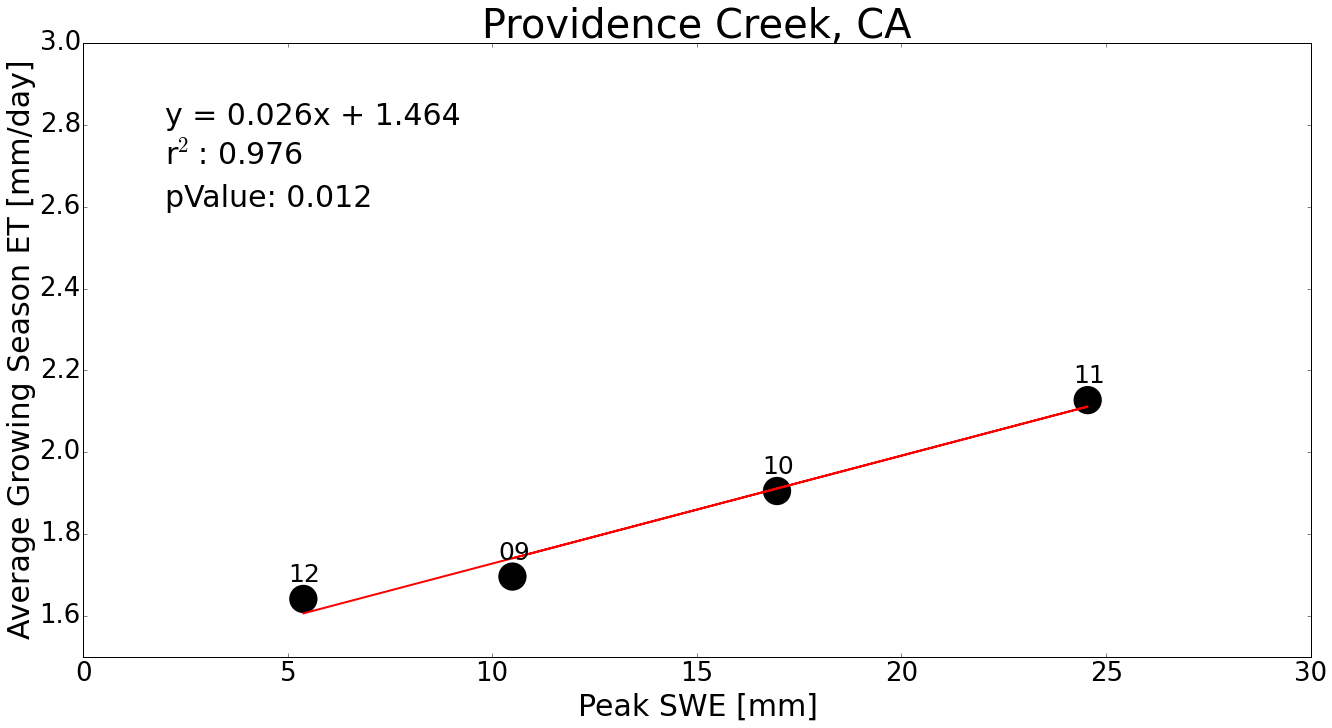

In [66]:
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

wyrs = ['09','10','11','12']
ttl = 'Providence Creek, CA'
x = SWE.peakswe
xlab = 'Peak SWE [mm]'
y = ET.aveGrowET
ylab = 'Average Growing Season ET [mm/day]'
out = './figures/agu14_figs/P301_growET_vs_PeakSWE.pdf'
annotatey = [2.8,2.7,2.6]

annotatex = 2

#######################################

x3 = x
y3 = y

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)

plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')

plt.xlim([0,30])
plt.ylim([1.5,3.])

ax = plt.gca()

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-', lw = 2)

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[1],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[2],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-12,17), ha='left',
                textcoords='offset points', fontsize=25)

plt.savefig(out,transparent = True, bbox_inches = 'tight')

In [63]:
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

wyrs = ['02','03','04','05','06','07','08','09','10','11','12']
ttl = 'Growing Season Partitioning SWE vs ablation rate'
x = SWE.ablationrate
xlab = 'Ablation Rate [mm/Day]'
y = MET.wyGrowPartitioningSWE
ylab = 'ET/PeakSWE [1]'
out = './figures/gsETSWE_vs_PeakSWE.pdf'
annotatey = [2,1.92,1.84,1.74]

annotatex = 18

#######################################

x3 = x
y3 = y

exclude = [2008]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yvals = linpred(slope, intercept, x)


plt.scatter(x, y, pointsize, c = 'k', edgecolor='none')
ax = plt.gca()


#cb = plt.colorbar()
#cb.set_label('Water Year', fontsize = axfont)

plt.title(ttl, fontsize = titlefont)
plt.ylabel(ylab, fontsize = axfont)
plt.xlabel(xlab, fontsize = axfont)
plt.plot(x, yvals, 'r-')


## regression without 2008

#x = x[x.index!=exclude]
#y = y[y.index!=exclude]

#slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
#yvals = linpred(slope2, intercept2, x)

#plt.plot(x, yvals, 'b-')

plt.setp(ax.get_xticklabels(), fontsize=axtickfont)
plt.setp(ax.get_yticklabels(), fontsize=axtickfont)
#cb.ax.tick_params(labelsize=axtickfont) 
#plt.ylim([0.3,1])
#plt.legend(['All data', 'Without 2008'],'lower left', fontsize = legendfontsize)

EQ = 'y = '+str(round(slope,3))+'x + '+str(round(intercept,3))

plt.text(annotatex,annotatey[0],'**All Data:**', fontsize = eqtext)
plt.text(annotatex,annotatey[1],EQ, fontsize = eqtext)
plt.text(annotatex,annotatey[2],'r$^2$: '+str(round(r_value**2,3)), fontsize = eqtext)
plt.text(annotatex,annotatey[3],'pValue: ' + str(round(p_value,3)), fontsize = eqtext)

#EQ = 'y = '+str(round(slope2,3))+'x + '+str(round(intercept2,3))

#plt.text(annotatex,annotatey[4],'**Without 2008:**', fontsize = eqtext)
#plt.text(annotatex,annotatey[5],EQ, fontsize = eqtext)
#plt.text(annotatex,annotatey[6],'r$^2$: '+str(round(r_value2**2,3)), fontsize = eqtext)
#plt.text(annotatex,annotatey[7],'pValue: ' + str(round(p_value2,3)), fontsize = eqtext)

for x2, y2, wyrs in zip(x3, y3, wyrs):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(wyrs), xy=(x2,y2), xytext=(-17,17), ha='left',
                textcoords='offset points', fontsize=25)

#plt.text(x,y,wyrs);
#plt.show

plt.savefig(out,transparent = True, bbox_inches = 'tight')

AttributeError: 'DataFrame' object has no attribute 'wyGrowPartitioningSWE'

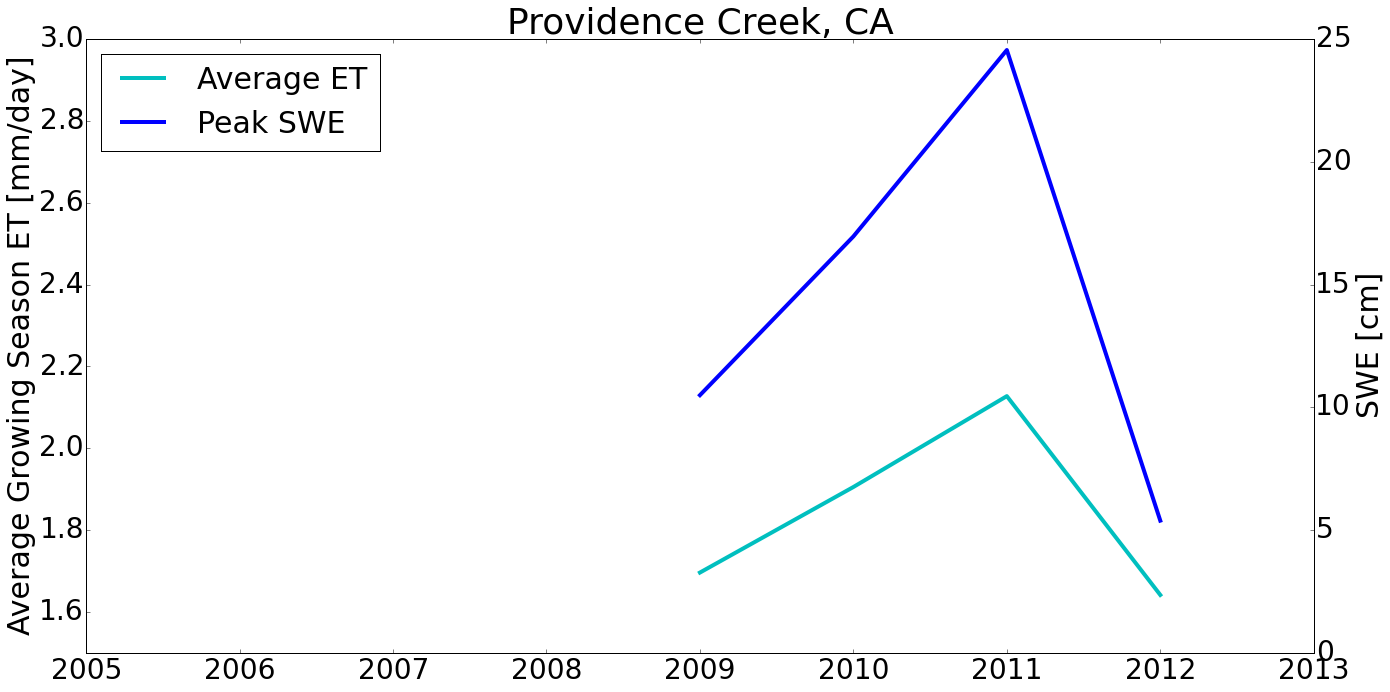

In [54]:
labfont = 30
titfont = 36
tickfont = 28
lw = 4
legfont = 30

plt.figure(figsize=[22,11]);
ax = plt.gca();
ax2 = ax.twinx();

lns1 = ax.plot(ET.index, ET.aveGrowET,'c-',lw=lw, label = 'Average ET');
ax.set_ylabel('Average Growing Season ET [mm/day]', fontsize = labfont);

lns2 = ax2.plot(SWE.index, SWE.peakswe,'b-',lw=lw,label = 'Peak SWE');
ax2.set_ylabel('SWE [cm]', fontsize = labfont);

lns = lns1+lns2
labs = [l.get_label() for l in lns];
ax.legend(lns, labs, loc='upper left', fontsize=legfont);
plt.xlim([2005,2013]);
ax.set_ylim([1.5,3])
ax2.set_ylim([0,25])

plt.title('Providence Creek, CA', fontsize=titfont);
ax.set_xticklabels(['2005','2006','2007','2008','2009','2010','2011','2012','2013'], fontsize=tickfont);
plt.setp(ax.get_yticklabels(), fontsize=tickfont);
plt.setp(ax2.get_yticklabels(), fontsize=tickfont);

plt.savefig('./figures/agu14_figs/P301_gsETvsPeakSWE_TS.pdf',transparent = True, bbox_inches='tight')

In [49]:
ET

,wyET,growET,aveGrowET
2009,418.304889,378.228153,1.696090
2010,399.239487,321.971065,1.905154
2011,488.751026,397.798562,2.127265
2012,442.284259,318.428610,1.641385
